In [1]:
#import the libraries
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv("C://Users//Astha//Downloads//train.csv") 
meal = pd.read_csv("C://Users//Astha//Downloads//meal.csv")
Humidity = pd.read_csv("C://Users//Astha//Downloads//Humidity.csv")
Weather = pd.read_csv("C://Users//Astha//Downloads//Weather.csv")

#importing csv file from desktop to python terminal
#we will replace the forward slashes by double backward slashes and at the end put the file name after double backward slash

In [3]:
#Merge train and meals df and will pull the data of meals in the train data set
newtrain = pd.merge(train,meal)
#in the left hand side we put that table name where we want to merge the other table ie we want to add meal name to train table , both tables have meal_id as common

In [4]:
newtrain.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai
1,1040403,1,24,1885,136.83,136.83,0,0,1498,Beverages,Thai
2,1103215,1,11,1885,136.83,136.83,0,0,959,Beverages,Thai
3,1034383,1,83,1885,121.31,120.31,0,1,1025,Beverages,Thai
4,1118999,1,32,1885,114.52,113.52,0,1,445,Beverages,Thai


# Descriptive Statistics

In [5]:
newtrain.base_price.mean()

354.1566274520107

In [6]:
newtrain.checkout_price.mean()

332.2389325547295

# It can be inferrred from the above data that base price avg > checkout price avg

In [7]:
print(newtrain.base_price.median())
print(newtrain.checkout_price.median())
#base price value is more thancheck out price

310.46
296.82


In [ ]:
#checkout price is the price that is paid by customer

In [10]:
#check which product is sold most
#what is the avg checkout price of that product
print(newtrain.category.value_counts())
print(newtrain[newtrain.category=="Beverages"]["checkout_price"].mean())
print(newtrain[newtrain.category=="Beverages"]["checkout_price"].median())

#inference drawn mean of the highest selling product is more than its median

Beverages       127890
Rice Bowl        33408
Sandwich         33291
Pizza            33138
Starters         29941
Other Snacks     29379
Desert           29294
Salad            28559
Pasta            27694
Seafood          26916
Biryani          20614
Extras           13562
Soup             12675
Fish             10187
Name: category, dtype: int64
213.26402353583643
176.57


In [4]:
#find out the homepage ads featured for beverages
newtrain[newtrain.category=="Beverages"]["homepage_featured"].sum()

14573

In [17]:
#find out the lowest saled product , its mean , median and mode and homepage ad featured for that category
print(newtrain.category.value_counts())
print(newtrain[newtrain.category=="Fish"]["checkout_price"].mean())
print(newtrain[newtrain.category=="Fish"]["checkout_price"].median())
print(newtrain[newtrain.category=="Fish"]["homepage_featured"].sum())

Beverages       127890
Rice Bowl        33408
Sandwich         33291
Pizza            33138
Starters         29941
Other Snacks     29379
Desert           29294
Salad            28559
Pasta            27694
Seafood          26916
Biryani          20614
Extras           13562
Soup             12675
Fish             10187
Name: category, dtype: int64
578.9920801021021
582.03
408


In [ ]:
#Inference 
#it can be inferred from highest sold value vs least sold product is that if there are high homepage ads featured, then high chances of sales is more

In [5]:
#check if email prom are done to improve fish sales as compared to beverages?
print("emailer_for_promotion for Beverages",newtrain[newtrain.category=="Beverages"]["emailer_for_promotion"].sum())
print("emailer_for_promotion for Fish",newtrain[newtrain.category=="Fish"]["emailer_for_promotion"].sum())

emailer_for_promotion for Beverages 6596
emailer_for_promotion for Fish 141


In [ ]:
#inference
#The homepage ft ad and emailer prom are responsible for the sales

In [20]:
#What is the summary stats of base price and check out price?
print(newtrain.base_price.describe())
print(newtrain.checkout_price.describe())

#in both the cases, the mean > median and hence the prices are SKEWED IN NATURE.

count    456548.000000
mean        354.156627
std         160.715914
min          55.350000
25%         243.500000
50%         310.460000
75%         458.870000
max         866.270000
Name: base_price, dtype: float64
count    456548.000000
mean        332.238933
std         152.939723
min           2.970000
25%         228.950000
50%         296.820000
75%         445.230000
max         866.270000
Name: checkout_price, dtype: float64


In [27]:
L= [1,2,3,4,4,4,4,5,6,7,8,9,10000]
np.mean(L)
np.median(L)


4.0

In [28]:
#Base price skewness and checkout price skewness
newtrain.base_price.skew()
#data is highly skewed that is positively skewed ie 63%

0.637660874129839

In [29]:
newtrain.checkout_price.skew()
#data is highly skewed that is positively skewed ie 67%

0.6723299047159774

In [30]:
#correlation bw checkout_price and base_price
np.corrcoef(newtrain.checkout_price,newtrain.base_price)
#data is higly  postive correlated ie 95% that means if base price increase checkout price also increases

array([[1.        , 0.95338907],
       [0.95338907, 1.        ]])

In [31]:
#correlation bw all variables -- correlation matrix
newtrain.corr()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
id,1.000000,0.002225,0.002641,0.000488,0.001941,0.002909,0.002001,0.003111,0.000702
week,0.002225,1.000000,-0.003450,0.019814,0.026581,0.028614,-0.000841,-0.008263,-0.017210
center_id,0.002641,-0.003450,1.000000,0.009893,0.001348,0.000604,0.013658,-0.005043,-0.053035
meal_id,0.000488,0.019814,0.009893,1.000000,0.010748,0.002605,0.013402,0.016354,0.010597
checkout_price,0.001941,0.026581,0.001348,0.010748,1.000000,0.953389,0.004818,-0.057184,-0.282108
base_price,0.002909,0.028614,0.000604,0.002605,0.953389,1.000000,0.171173,0.057156,-0.222306
emailer_for_promotion,0.002001,-0.000841,0.013658,0.013402,0.004818,0.171173,1.000000,0.390534,0.277147
homepage_featured,0.003111,-0.008263,-0.005043,0.016354,-0.057184,0.057156,0.390534,1.000000,0.294490
num_orders,0.000702,-0.017210,-0.053035,0.010597,-0.282108,-0.222306,0.277147,0.294490,1.000000


# inference from correlation matrix

1. There is a negative correlation bw checkout_price and num_orders.
2.The base price and checkout price are highly correlated.
3.There is a substansial positive corr bw email the triggered and number of orders . Same goes for highlight feature.4
4. checkout price has very weak corr with email triggered

In [33]:
#Find the range of of checkout prices

newtrain.checkout_price.max() - newtrain.checkout_price.min()

863.3

In [34]:
print(newtrain.checkout_price.max())
print(newtrain.checkout_price.min())

866.27
2.97


In [35]:
newtrain.base_price.max() - newtrain.base_price.min()

810.92

In [36]:
newtrain.num_orders.max() - newtrain.num_orders.min()

24286

In [37]:
newtrain.num_orders.describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

# Data Visualization

In [6]:
#import the data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
#both libraries are used for datA VISUALIZATION ie graphs bars charts
%matplotlib inline
#this code ensures that all the plots are printed

In [ ]:
plt.show()

###Types of plots

1.Sacatterplot - when X and Y are continuous values
2. Boxplot - It is statistical plot and it is created when X axis values are categorical (i.e categories) and Y axis numerical(continuous).
3. Barplot - This is created when the x axis has categorical values and y axis has the frequency/count of those cat variable.
4.Histogram - This is a statistical plot and it tells me about the shape of data(values).This plot is created when the x axis vakues are numerical in nature and y axis gives me the frequency of the same . in a nutshell, it is a one variable plot

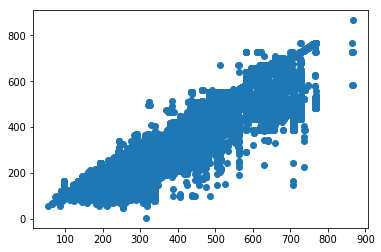

In [8]:
plt.scatter(newtrain.base_price, newtrain.checkout_price)

Text(0.5, 1.0, ' Scatterplot - Base price vs Checkout price')

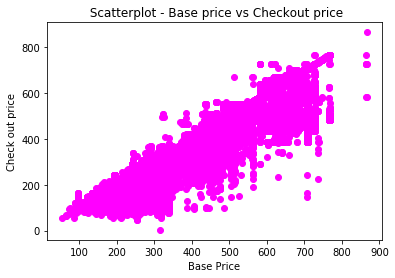

In [11]:
plt.scatter(newtrain.base_price, newtrain.checkout_price , color = 'magenta')
plt.xlabel("Base Price") #labeling the X axis values
plt.ylabel("Check out price")
plt.title(" Scatterplot - Base price vs Checkout price")

Text(0.5, 1.0, ' Scatterplot - Checkout price vs Number of orders')

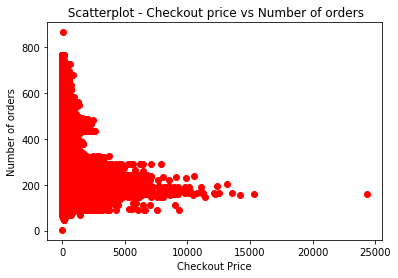

In [13]:
plt.scatter(newtrain.num_orders, newtrain.checkout_price , color = 'red')
plt.xlabel("Checkout Price") #labeling the X axis values
plt.ylabel("Number of orders")
plt.title(" Scatterplot - Checkout price vs Number of orders")



Text(0.5, 1.0, ' Scatterplot - Base price vs Number of orders')

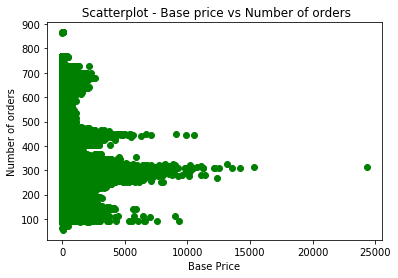

In [14]:
plt.scatter(newtrain.num_orders, newtrain.base_price , color = 'green')
plt.xlabel("Base Price") #labeling the X axis values
plt.ylabel("Number of orders")
plt.title(" Scatterplot - Base price vs Number of orders")



Text(0.5, 1.0, ' Scatterplot - Checkout price vs Email for promotion')

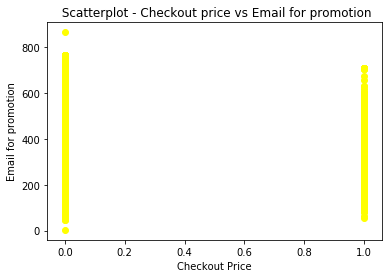

In [15]:
plt.scatter(newtrain.emailer_for_promotion, newtrain.checkout_price , color = 'yellow')
plt.xlabel("Checkout Price") #labeling the X axis values
plt.ylabel("Email for promotion")
plt.title(" Scatterplot - Checkout price vs Email for promotion")



In [19]:
newtrain.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine'],
      dtype='object')

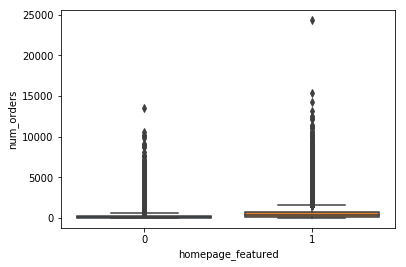

In [17]:
#When the x axis becomes categorical ie 0 or 1 or string based data and 
#y axis is numrical thenwe create BOXPLOT
#plot between  between the home page featured vs the num of orders

sns.boxplot(x = "homepage_featured" , y = "num_orders", data = newtrain)

In [21]:
Humidity

,date,city,temperature,humidity
0,05/01/17,new york,65,56
1,05/02/17,new york,66,58
2,05/03/17,new york,68,60
3,05/01/17,mumbai,75,80
4,05/02/17,mumbai,78,83
5,05/03/17,mumbai,82,85
6,05/01/17,beijing,80,26
7,05/02/17,beijing,77,30
8,05/03/17,beijing,79,35


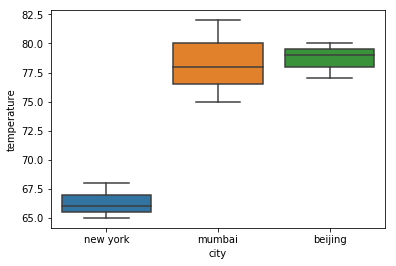

In [26]:
sns.boxplot(x = "city",y="temperature", data= Humidity)

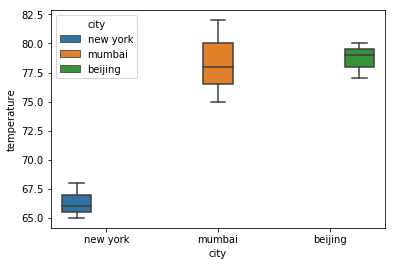

In [27]:
sns.boxplot(x = "city",y="temperature", data= Humidity, hue = "city")

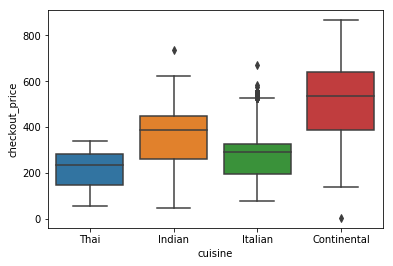

In [29]:
sns.boxplot(x = "cuisine",y="checkout_price", data= newtrain)

In [31]:
newtrain.checkout_price.describe()

count    456548.000000
mean        332.238933
std         152.939723
min           2.970000
25%         228.950000
50%         296.820000
75%         445.230000
max         866.270000
Name: checkout_price, dtype: float64

In [32]:
(445-228)*1.5

325.5

In [33]:
newtrain[newtrain.checkout_price !=2.97]["checkout_price"].min()

45.62

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


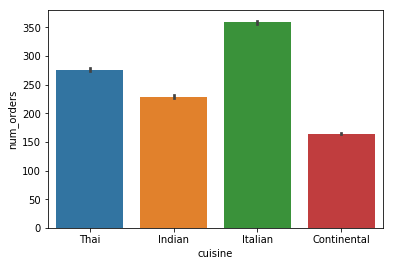

In [37]:
#Barplot gives the count of values occuring
sns.barplot(x="cuisine" ,y= "num_orders" ,data= newtrain)

(array([1.85370e+04, 7.07190e+04, 1.18989e+05, 8.38270e+04, 5.05950e+04,
        4.18240e+04, 2.16040e+04, 4.17020e+04, 8.74300e+03, 8.00000e+00]),
 array([ 55.35 , 136.442, 217.534, 298.626, 379.718, 460.81 , 541.902,
        622.994, 704.086, 785.178, 866.27 ]),
 <a list of 10 Patch objects>)

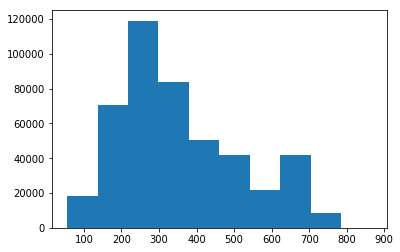

In [38]:
#histogram 
plt.hist(newtrain.base_price)

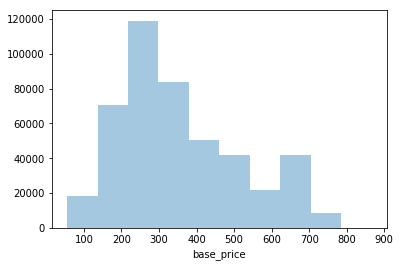

In [43]:
sns.distplot(newtrain.base_price , bins =10, kde = False)  #kde  is kernal dist function ie the curve and hist is the bars part
#bins is the class interval

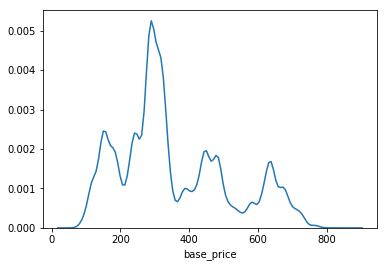

In [41]:
sns.distplot(newtrain.base_price , hist =False )

# Steps to follow while EDA

1. Import data sets

2. Check the shape and size of data

3.Obtain information about all the columns [object vs numeric]

4. Describe the data using .describe function

tip - remember that describe functions provide statistical summary of the numerical columns . If you want to the see the summary of Cat variables, then use .describe(include = "Object")

5. Finding the mean - use .mean( to find the mean.

Note - .mean , .media( are the programmed to give the mean and median columnwise. If you need the mean and median to throw values rowwise , then you must provide .mean(axis=1). Here axis = 1 means calc the mean ROW WISE.

6. Find the standard deviation so that it can be gauged that what is the variance level of data points.

7. Find the correlation between the two numerical variables using np.corrcoef() or [data.col1,data.col2].corr()

8. Create Data Visualization plots to verify the same results.

9. About Plots - X and Y numerical/continuos : SCATTERPLOT
               - X Cat and Y  Numerical : BOXPLOT
               - X CAT - BARPLOT
                 
10. Conclude your findings uptill now.